# Participant Screening - Experiment 5: IT Split Range

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from glob import glob

DATAFILE = '../data/response_data.csv'
OUTFILE = '../data/excluded.txt'

# Load data

In [2]:
all_data = pd.read_csv(DATAFILE)
data = all_data.copy()

# Headphone Test
Identify participants who got answered fewer than four headphone test trials correctly.

EXCLUDED: 16
[  2   9  14  19  39  42  44  45  57  71  75  84  96 101 102 110]


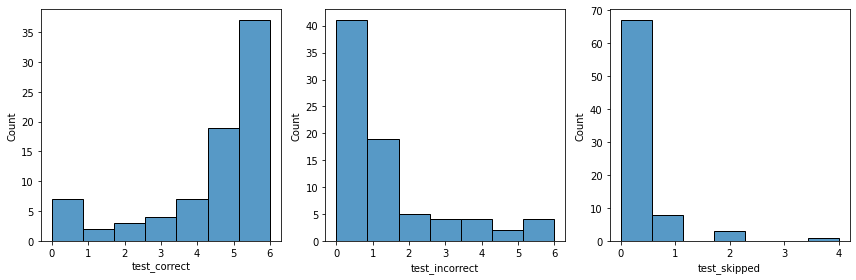

In [3]:
grouped = data.groupby('subject')
failed_test = grouped.test_correct.mean() < 4
failed_test = np.array(failed_test[failed_test].reset_index().subject)
print('EXCLUDED: %i' % len(failed_test))
print(failed_test)

# Audio test performance
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(grouped.test_correct.mean(), bins=7)
plt.subplot(132)
sns.histplot(grouped.test_incorrect.mean(), bins=7)
plt.subplot(133)
sns.histplot(grouped.test_skipped.mean(), bins=7)
plt.tight_layout()

# Drop excluded subjects before proceeding
data = data[~np.isin(data.subject, failed_test)]

# Extreme Response Check
Identify participants who responded 0/50/100 at least 150 times.

EXCLUDED: 0
[]


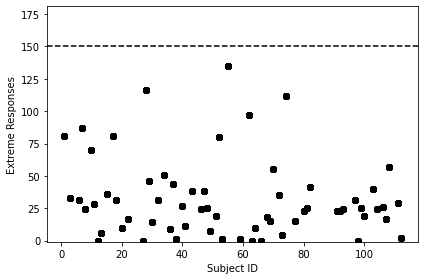

In [4]:
grouped = data.groupby('subject')
extreme_resp = grouped.extreme_responses.mean() >= 150
extreme_resp = np.array(extreme_resp[extreme_resp].reset_index().subject)
print('EXCLUDED: %i' % len(extreme_resp))
print(extreme_resp)

plt.scatter(data.subject, data.extreme_responses, c='k', label='Included')
plt.axhline(150, c='k', ls='--')
plt.ylim(-1, 181)
plt.ylabel('Extreme Responses')
plt.xlabel('Subject ID')
plt.tight_layout()

# Drop excluded subjects before proceeding
data = data[~np.isin(data.subject, extreme_resp)]

# Outlier Response Check
Exclude participants whose responses were correlated r < .5 with the log of IOI.

EXCLUDED: 1
[98]


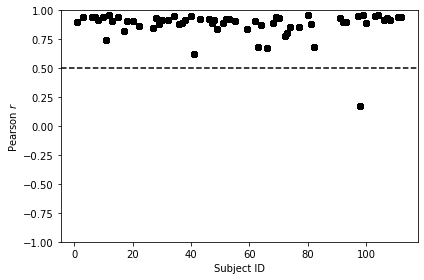

In [5]:
grouped = data.groupby('subject')
outlier = grouped.pearsonr.mean() < .5
outlier = np.array(outlier[outlier].reset_index().subject)
print('EXCLUDED: %i' % len(outlier))
print(outlier)

plt.scatter(data.subject, data.pearsonr, c='k')
plt.axhline(.5, c='k', ls='--')
plt.ylim(-1, 1)
plt.ylabel('Pearson $r$')
plt.xlabel('Subject ID')
plt.tight_layout()

# Drop excluded subjects before proceeding
data = data[~np.isin(data.subject, outlier)]

# Save Exclusion

In [6]:
excluded = np.union1d(np.union1d(failed_test, extreme_resp), outlier)
included = data.subject.unique()
np.savetxt(OUTFILE, excluded, fmt='%i')

In [7]:
conditions = np.array([x[0] for x in all_data.groupby('subject').range.unique()])
incl_conditions = np.array([x[0] for x in data.groupby('subject').range.unique()])

print('EXCLUSION LIST:', excluded.tolist())
print('INCLUSION LIST:', included.tolist())
print('TOTALS:', len(excluded) + len(included), len(included))
print('CONDITIONS:', np.sum(conditions == 0), np.sum(conditions == 1), np.sum(incl_conditions == 0), np.sum(incl_conditions == 1))

EXCLUSION LIST: [2, 9, 14, 19, 39, 42, 44, 45, 57, 71, 75, 84, 96, 98, 101, 102, 110]
INCLUSION LIST: [1, 3, 6, 7, 8, 10, 11, 12, 13, 15, 17, 18, 20, 27, 22, 28, 29, 30, 32, 34, 36, 37, 38, 41, 43, 40, 48, 46, 47, 49, 51, 52, 53, 55, 59, 62, 63, 64, 66, 68, 69, 70, 72, 73, 74, 77, 80, 81, 82, 92, 93, 91, 97, 99, 100, 104, 103, 106, 107, 108, 111, 112]
TOTALS: 79 62
CONDITIONS: 39 40 28 34
